In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
loader = DataLoader(dataset, batch_size=1024, shuffle=False, num_workers=2)

mean = 0.0
std = 0.0
nb_samples = 0

for data, _ in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: tensor([0.4914, 0.4822, 0.4465])
Std: tensor([0.2023, 0.1994, 0.2010])


In [4]:
print(len(dataset))
print(len(loader))

50000
49


In [5]:
# following AlexNet w/o PCA altering the intensities of the RGB channels
augment = transforms.Compose([
    transforms.RandomCrop(size=(32, 32), padding=4), 
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [6]:
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=augment)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.7345903].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.7541041].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.106997].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.6175063].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.455924].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.4788387].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.459173].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..2.6955624].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290528..

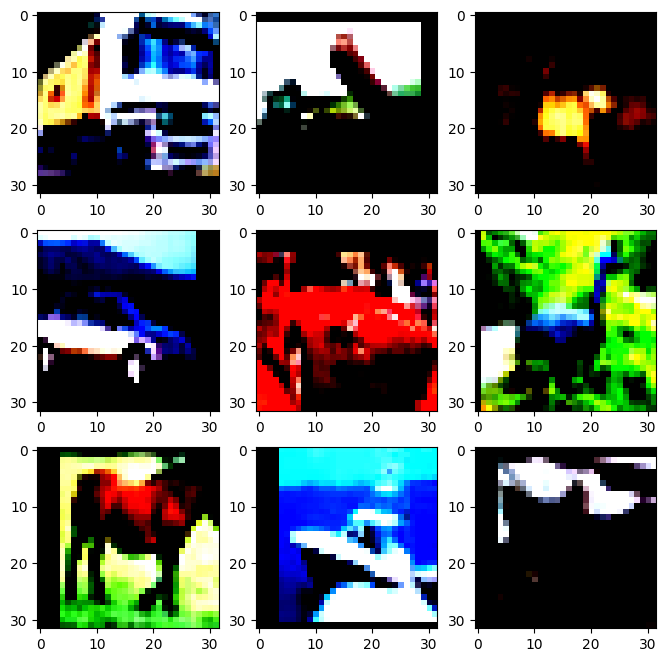

In [7]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    img, label = dataset[i]
    figure.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0).numpy())

# Training run vizualiation 


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_json("metrics/metrics-2025-05-25-23-17-58.jsonl", lines=True)
df

,epoch,step,train_loss,train_acc,grad_norm,step_time,lr,val_loss,val_acc
0,1,0.0,2.308098,0.098633,1.043626,959.828708,0.000300,NaN,NaN
1,1,1.0,2.317089,0.115234,1.393059,96.229707,0.000300,NaN,NaN
2,1,2.0,2.198727,0.208008,1.022513,96.714950,0.000300,NaN,NaN
3,1,3.0,2.107494,0.251953,1.158181,92.017758,0.000300,NaN,NaN
4,1,4.0,2.022034,0.253906,1.039551,91.698767,0.000300,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12145,300,11996.0,0.015797,0.996094,0.784215,91.707030,0.000001,NaN,NaN
12146,300,11997.0,0.019719,0.991211,0.950404,92.043894,0.000001,NaN,NaN
12147,300,11998.0,0.016954,0.994141,0.871504,92.984220,0.000001,NaN,NaN
12148,300,11999.0,0.009595,1.000000,1.000726,7.960760,0.000001,NaN,NaN


In [54]:
train = df[df["train_loss"].notna()].copy()
val   = df[df["val_loss"].notna()].copy()

In [55]:
train_epoch = (
    train
    .sort_values(["epoch", "step"])
    .groupby("epoch", as_index=False)
    .last()[["epoch", "train_loss", "train_acc"]]
)

epoch_df = pd.merge(
    train_epoch,
    val[["epoch", "val_loss", "val_acc"]],
    on="epoch"
)

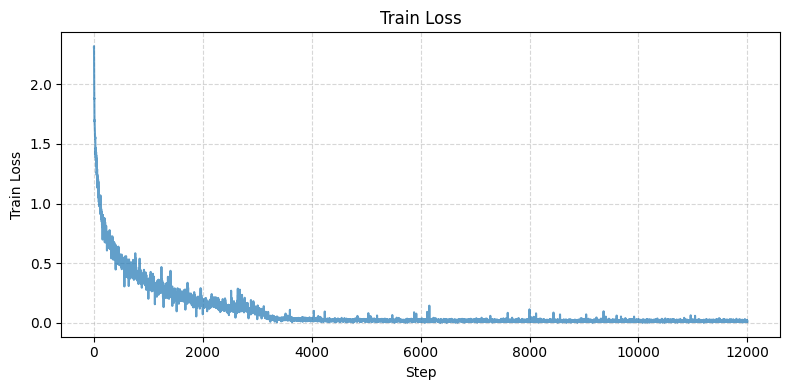

In [56]:
plt.figure(figsize=(8,4))
plt.plot(train["step"], train["train_loss"], alpha=0.7)
plt.xlabel("Step"); plt.ylabel("Train Loss")
plt.title("Train Loss")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

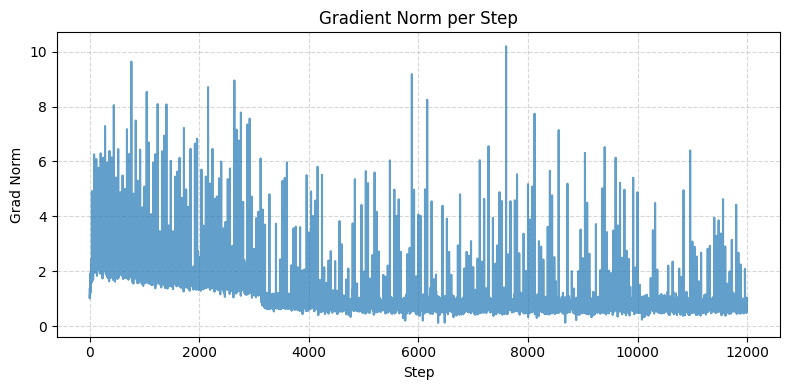

In [57]:
plt.figure(figsize=(8,4))
plt.plot(train["step"], train["grad_norm"], alpha=0.7)
plt.xlabel("Step"); plt.ylabel("Grad Norm")
plt.title("Gradient Norm per Step")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

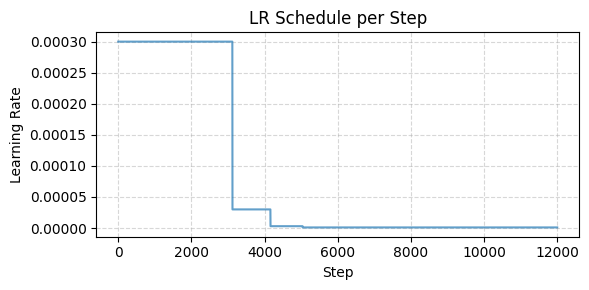

In [58]:
plt.figure(figsize=(6,3))
plt.plot(train["step"], train["lr"], alpha=0.7)
plt.xlabel("Step"); plt.ylabel("Learning Rate")
plt.title("LR Schedule per Step")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

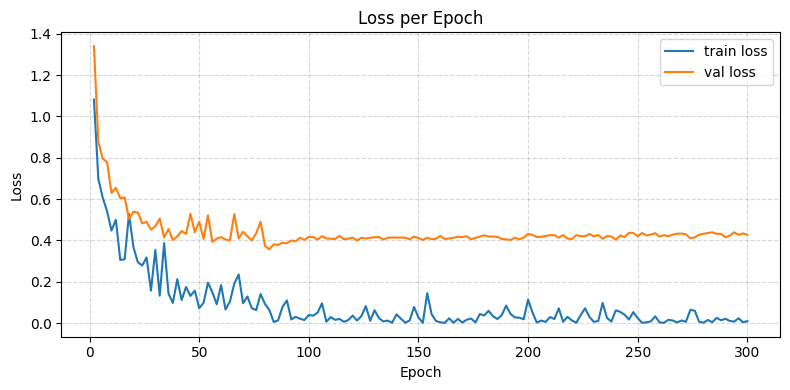

In [61]:
# --- Loss per epoch ---
plt.figure(figsize=(8,4))
plt.plot(epoch_df["epoch"], epoch_df["train_loss"], label="train loss")
plt.plot(epoch_df["epoch"], epoch_df["val_loss"], label="val loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

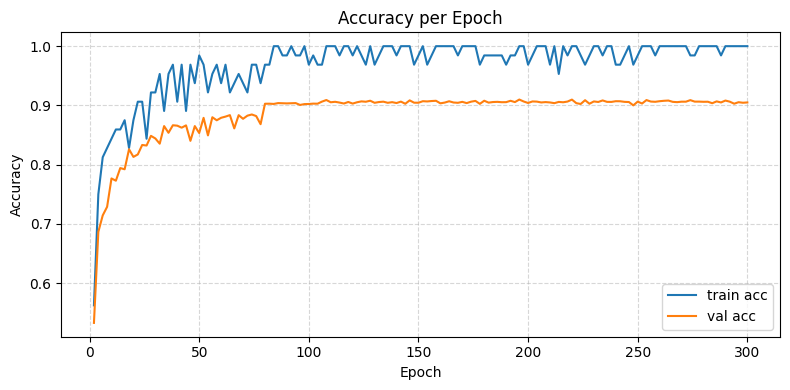

In [62]:
# --- Accuracy per epoch ---
plt.figure(figsize=(8,4))
plt.plot(epoch_df["epoch"], epoch_df["train_acc"], label="train acc")
plt.plot(epoch_df["epoch"], epoch_df["val_acc"],label="val acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()